# Cherry Blossoms!

If we travel back in time, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were once in full bloom! We don't live in Japan or DC, but in non-COVID times we also have the [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2020).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's completely out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [ ]:
!pip install xlrd

  Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)  \
0  This phenological data was acquired by followi...                                                             
1                                                NaN                                                             
2                                     Column A; A.D.                                                             
3       Column B; Full-flowering date (day of year).                                                             
4  Column C; Full-flowering date (calender date, ...                                                             

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  
0        NaN        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN        NaN  
4        NaN        

In [ ]:
import pandas as pd

  Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)  \
0  This phenological data was acquired by followi...                                                             
1                                                NaN                                                             
2                                     Column A; A.D.                                                             
3       Column B; Full-flowering date (day of year).                                                             
4  Column C; Full-flowering date (calender date, ...                                                             

  Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  
0        NaN        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN        NaN  
4        NaN        

## 1. Read in the file using pandas, and look at the first five rows

In [4]:
df = pd.read_excel("KyotoFullFlower7.xls")

df.head(5)

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time use the `skiprows=` parameter to skip the rows you don't want.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [22]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows=25)

df.head(5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [14]:
df.head(-5)

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-
...,...,...,...,...,...,...
1205,2006,98.0,408.0,5.0,0.0,NEWS-PAPER(ARASHIYAMA)
1206,2007,97.0,407.0,5.0,0.0,NEWS-PAPER(ARASHIYAMA)
1207,2008,95.0,404.0,6.0,0.0,NEWS-PAPER(ARASHIYAMA)
1208,2009,95.0,405.0,6.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [23]:
df = pd.read_excel("KyotoFullFlower7.xls", skiprows = 25, na_values=[0, "-"])

df.head(5)


,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,NaN
1,802,NaN,NaN,NaN,NaN,NaN
2,803,NaN,NaN,NaN,NaN,NaN
3,804,NaN,NaN,NaN,NaN,NaN
4,805,NaN,NaN,NaN,NaN,NaN


## 4. What source is the most common as a reference?

In [ ]:
print(df.columns)

df["Data type code"].value_counts()

Index(['AD', 'Full-flowering date (DOY)', 'Full-flowering date', 'Source code',
       'Data type code', 'Reference Name'],
      dtype='object')


Data type code
2.0    454
1.0    166
4.0     39
3.0     30
8.0     11
9.0      3
Name: count, dtype: int64

In [ ]:
print("The most common source as a refernce is 2.0 [from diary description about cherry blossom viewing party.")

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

Remember, NaN is not a string, you need a special approach to filtering missing data.

In [38]:
df.columns

Index(['AD', 'Full-flowering date (DOY)', 'Full-flowering date', 'Source code',
       'Data type code', 'Reference Name'],
      dtype='object')

In [35]:
df = df[df["Full-flowering date (DOY)"].notna()]

## 7. Make a histogram of the full-flowering date

<Axes: >

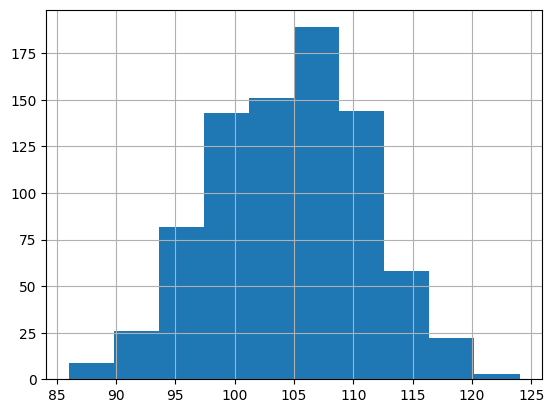

In [36]:
df["Full-flowering date (DOY)"].hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

<Axes: >

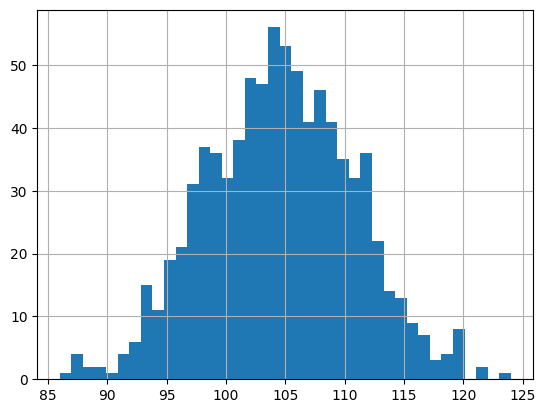

In [37]:
df["Full-flowering date (DOY)"].hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [39]:
df.columns

Index(['AD', 'Full-flowering date (DOY)', 'Full-flowering date', 'Source code',
       'Data type code', 'Reference Name'],
      dtype='object')

In [51]:
df["Full-flowering date"].notna().agg(['mean', 'count'])

mean       1.0
count    827.0
Name: Full-flowering date, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [ ]:
df_toblossom = df[(df['AD'] >= 801) & (df['AD'] <= 1900)]

avg_blossom = df_toblossom["Full-flowering date (DOY)"].mean().round()

print("The average days before 1900 until blossoming is", avg_blossom)

The average days until blossoming is 105.0


## 11. How about after 1900?

In [66]:
df_afterblossom = df[(df['AD'] >= 1900)]

avg_afterblossom = df_afterblossom["Full-flowering date (DOY)"].mean().round()

print("The average days after 1900 until blossoming is", avg_afterblossom)

The average days after 1900 until blossoming is 102.0


## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [70]:
df.columns

df["Data type code"].value_counts()[4]

np.int64(39)

## 13. Show only the years where our data was from a title in Japanese poetry

In [73]:
poetry_years = df[df['Data type code'].astype(str).str.contains('4', na=False)]

print(poetry_years["AD"])

90       891
94       895
95       896
122      923
154      955
168      969
206     1007
232     1033
235     1036
259     1060
260     1061
283     1084
294     1095
381     1182
389     1190
400     1201
415     1216
418     1219
420     1221
422     1223
435     1236
464     1265
467     1268
468     1269
470     1271
488     1289
500     1301
523     1324
529     1330
646     1447
652     1453
653     1454
673     1474
733     1534
791     1592
839     1640
860     1661
1045    1846
1062    1863
Name: AD, dtype: int64


## 14. Graph the full-flowering date (DOY) over time

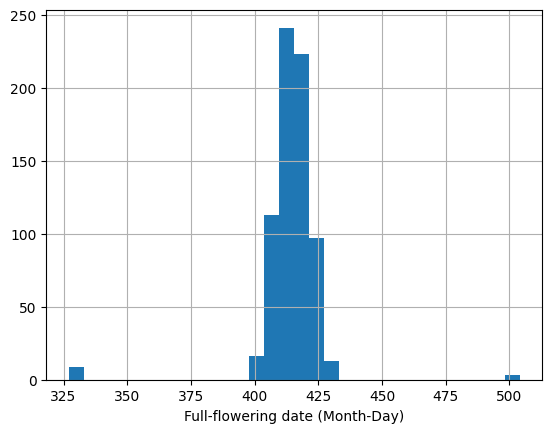

In [86]:
df['Full-flowering date'].hist(bins=30)
plt.xlabel('Full-flowering date (Month-Day)')
plt.show()

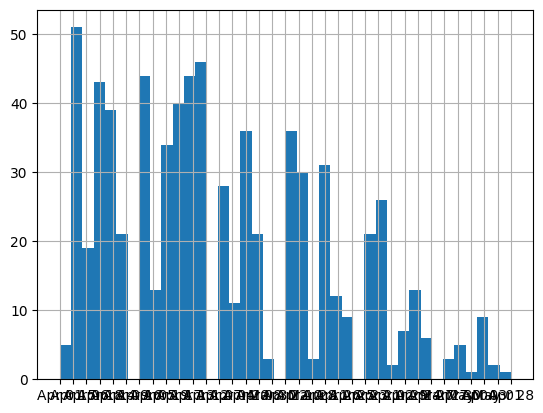

In [94]:
df['readable_date'] = pd.to_datetime(df['Full-flowering date'], format='%m%d').dt.strftime('%b %d').hist(bins=40)


## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [ ]:
df.rolling(10, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

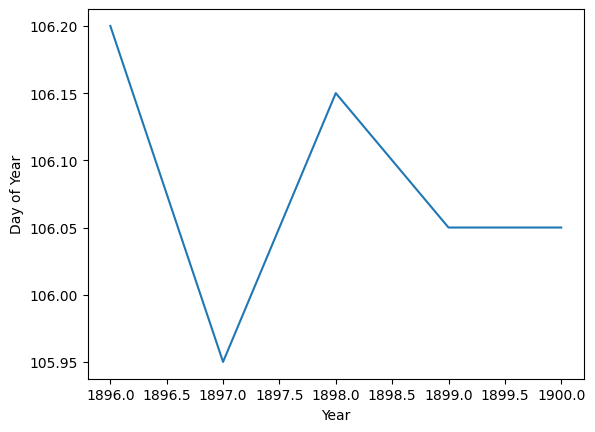

In [103]:
df["rolling_date"] = df.rolling(20, on='AD', min_periods=5)['Full-flowering date (DOY)'].mean().tail()

plt.plot(df['AD'], df['rolling_date'])
plt.xlabel('Year')
plt.ylabel('Day of Year')
plt.show()

#adding y-lim makes it a straight line?

Use the code above (or ChatGPT) to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a true column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

To convert a string that *looks* like a date into something that *is* a date you use `pd.to_datetime(df['colname'])`. Usually you're converting nice dates like `2025-01-01`, but in this case it's much worse.

If pandas doesn't figure it out automatically with `pd.to_datetime`, you need to pass a `format=` argument that explains what the format is of the datetime. You use [the codes here](https://strftime.org/) to mark out where the days, months, etc are. For example, `2020-04-09` would be converted using `pd.to_datetime(df['colname'], "format='%Y-%m-%d")`. **How would you describe the format of the current date data?**

* Adding `errors='coerce'` will return `NaN` for missing values. By default it just yells "I don't know what to do!!!"

In [ ]:
#current date data is DOY, as listed. The non-DOY one is MMDD.

df['Month'] = pd.to_datetime(df['Full-flowering date (DOY)'], format='%j').dt.month_name()



Month
April    703
March      9
May        3
Name: count, dtype: int64

### 17. Using your new column, how many blossomings happened in each month?

You can extract the month from the datetime column using `df['colname'].dt.month`.

In [ ]:
df["Month"].value_counts()

'AprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilMarchAprilAprilAprilAprilMarchAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilMarchAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilMarchAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilApri

### 18. Graph how many blossomings happened in each month.

Hopefully you're just adding `.plot()` onto the last answer.

<Axes: xlabel='Month'>

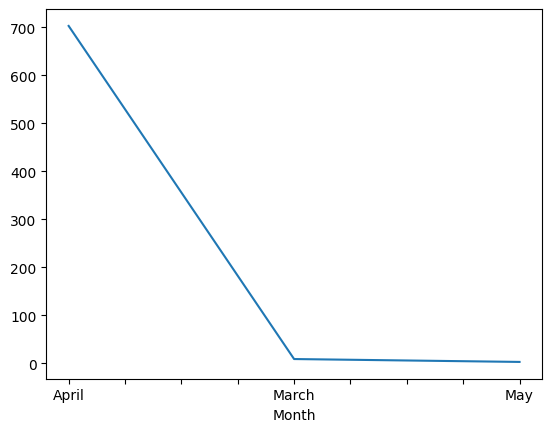

In [122]:
df["Month"].value_counts().plot()

# YOU ARE DONE.

And **incredible.**